In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt

/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
pwd

'/mnt/home/tmekuria'

In [8]:
cd "/mnt/sdceph/users/smenon/RHDSphereKrome/GalaxyICsHydroDef" 

/mnt/sdceph/users/smenon/RHDSphereKrome/GalaxyICsHydroDef


In [9]:
plot_files = [yt.load("RHDTurb_hdf5_plt_cnt_{:04d}".format(n)) for n in range(201)]

/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
yt : [INFO     ] 2025-01-31 12:33:32,962 Particle file found: RHDTurb_hdf5_part_0000
yt : [INFO     ] 2025-01-31 12:33:33,036 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-01-31 12:33:33,039 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-01-31 12:33:33,042 Parameters: domain_left_edge          = [-4.31995267e+21 -4.31995267e+21 -4.31995267e+21]
yt : [INFO     ] 2025-01-31 12:33:33,045 Parameters: domain_ri

In [10]:
ts = [file.current_time.in_units('yr') for file in plot_files]

In [11]:
rhos = [plot_files[i].all_data()['dens'].in_units('g/cm**3')      for i in [25,50,100,150]]
Ts  =  [plot_files[i].all_data()['temp'].in_units('K')            for i in [25,50,100,150]]
Ms  =  [plot_files[i].all_data()['cell_mass'].in_units('solMass') for i in [25,50,100,150]]

In [12]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

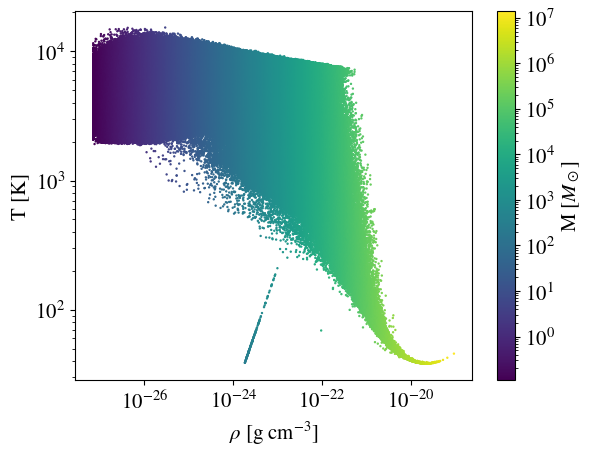

In [13]:
plt.scatter(rhos[0].value,Ts[0].value,
            c=Ms[0].value,s=5e-1,
           norm='log')
plt.loglog()
plt.xlabel(r'$\rho \ \mathrm{[g\ cm^{-3}]}$')
plt.ylabel('T [K]')

plt.colorbar(label = r'M [$M_\odot$]')

/tmp/ipykernel_1181822/295829525.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


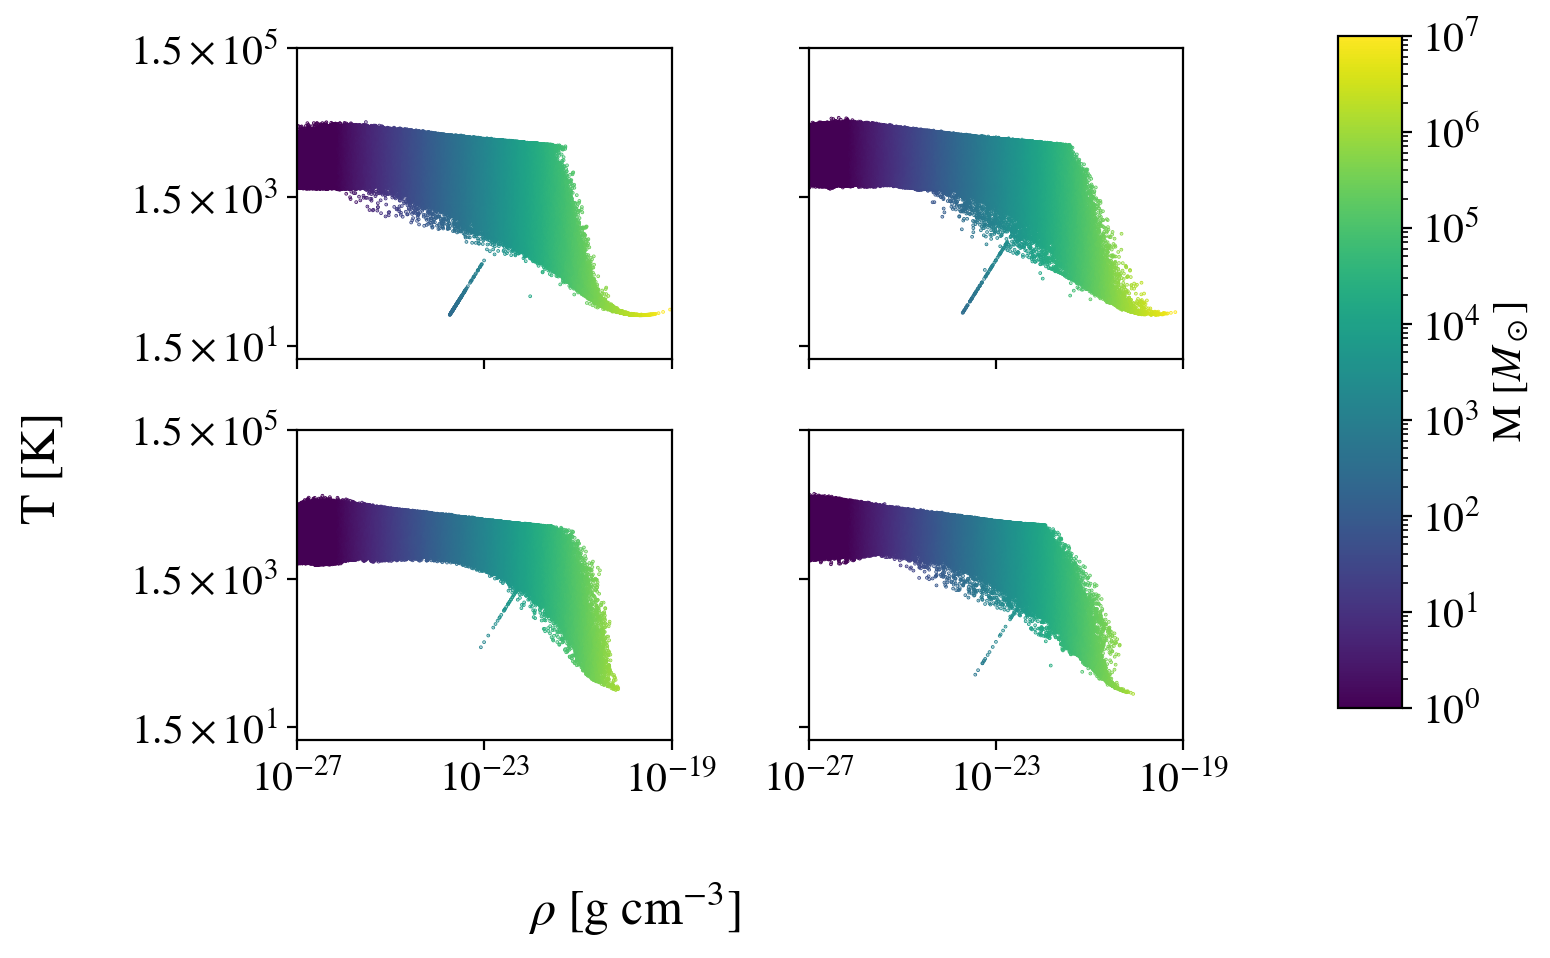

In [9]:
fig,axs = plt.subplots(2,2,dpi=200)

for ax,rho,T,M in zip(axs.flat,rhos,Ts,Ms):
    im = ax.scatter(rho,T,c=M,norm='log',
                    s=1e-1,vmin=1e0,vmax=1e7)
    ax.loglog()
    ax.set_xlim(1e-27,1e-19)
    ax.set_ylim(1e1,3e4)
    ax.set_xticks([1e-27,1e-23,1e-19])
    ax.set_yticks([15,1500,150000])
    ax.label_outer()

cbar_ax = fig.add_axes([1.05, 0.25, 0.05, 0.7])
fig.colorbar(im,cax=cbar_ax,label = r'M [$M_\odot$]')


fig.supxlabel(r'$\rho \ [\mathrm{g\ cm^{-3}}]$')
fig.supylabel('T [K]')

plt.subplots_adjust(wspace=0.3,hspace=0.2)
fig.tight_layout()

In [8]:
slc = yt.ProjectionPlot(plot_files[13],'z','dens')

yt : [INFO     ] 2025-01-28 08:37:31,000 Projection completed
yt : [INFO     ] 2025-01-28 08:37:31,003 xlim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:37:31,004 ylim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:37:31,006 xlim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:37:31,007 ylim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:37:31,011 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



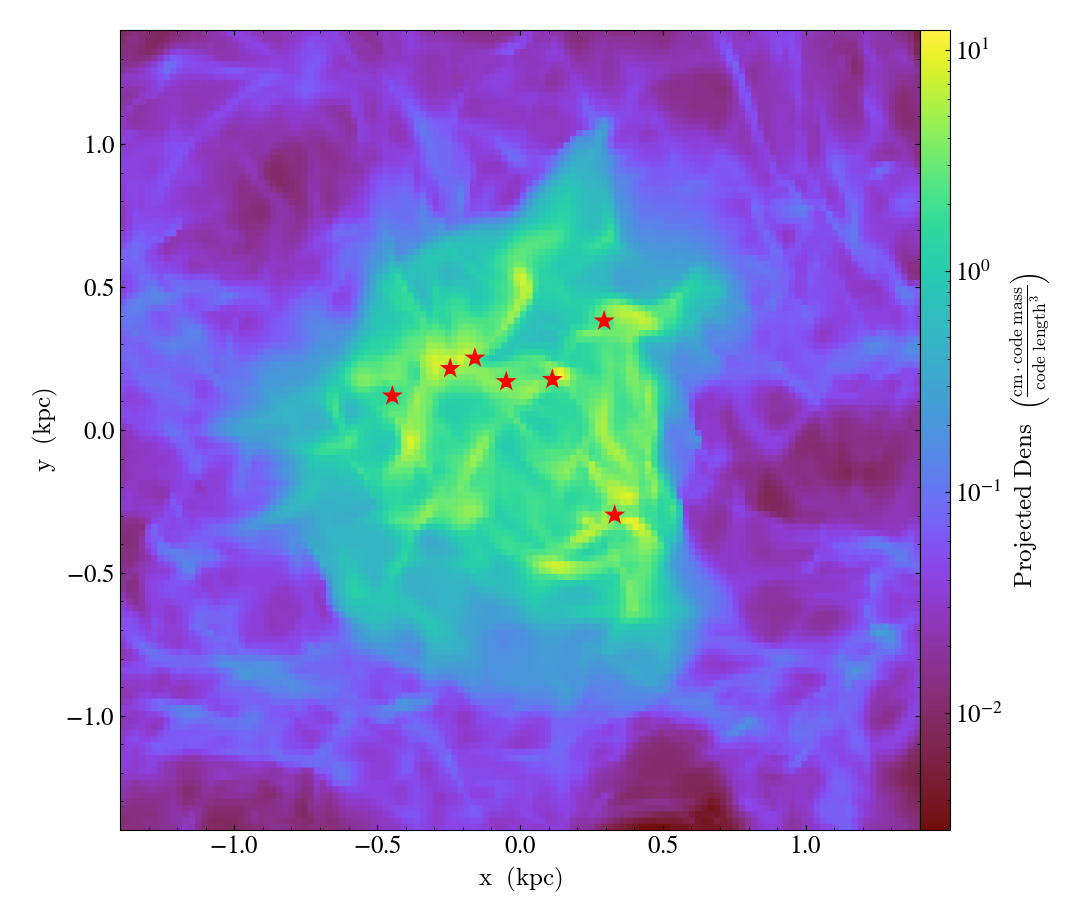

In [17]:
slc.annotate_particles(width=(2,'kpc'),p_size=250.,marker='*',col='red')


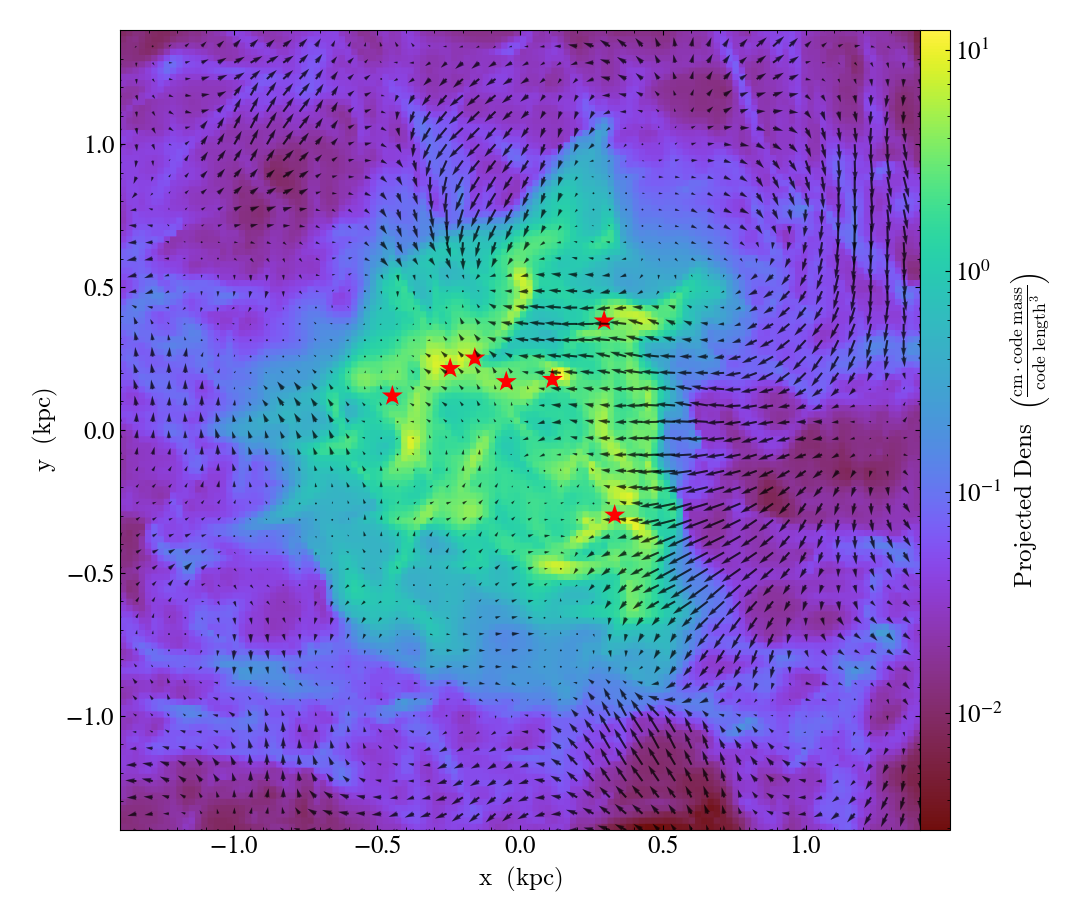

In [27]:
slc.annotate_velocity(headwidth=3,alpha=0.5) #Annotate the velocity field with quivers to visualise the vector

In [ ]:
#skipping 12th file, somehow corrupted
slcs_pt1 = [yt.ProjectionPlot(plot_files[i],'z','dens') for i in range(12)]
slcs_pt2 = [yt.ProjectionPlot(plot_files[i],'z','dens') for i in range(13,201)]

yt : [INFO     ] 2025-01-28 08:45:29,881 xlim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:45:29,883 ylim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:45:29,885 xlim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:45:29,886 ylim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:45:29,891 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800
yt : [INFO     ] 2025-01-28 08:45:31,169 Projection completed
yt : [INFO     ] 2025-01-28 08:45:31,171 xlim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:45:31,172 ylim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:45:31,174 xlim = -4319952671731075776512.000000 4319952671731075776512.000000
yt : [INFO     ] 2025-01-28 08:45:31,175 ylim = -431995267173107577

In [ ]:
slcs_all = slcs_pt1+slcs_pt2

In [ ]:
[(
    slc.annotate_particles(width=(2,'kpc'),p_size=250.,marker='*',col='red'),
    slc.annotate_velocity(headwidth=3,alpha=0.5) 

) for slc in slcs_all()]

In [ ]:
fig_names = ["RHDTurb_rho_zproj_{:04d}".format(n+1)+".png" for n in range(12)]+\ #so it ends up as 1-12 instead of 0-11
["RHDTurb_rho_zproj_{:04d}".format(n)+".png" for n in range(13,201)]

In [ ]:
pwd

In [ ]:
mydir = '../../../tmekuria/'

In [ ]:
[slc.save(mydir+fig_name) for slc,fig_name in zip(slcs_all,fig_names)]